1 Exploratory Data Analysis
1.1 Understanding the Data

In [4]:
#import libraries and upload data files
import pandas as pd
import numpy as np
import io
df= pd.read_csv("street_light_fault_prediction_dataset.csv")
print(df)

       bulb_number            timestamp  power_consumption (Watts)  \
0                1  2023-09-06 07:53:23                   106.1800   
1                1  2023-03-28 16:28:29                    58.7100   
2                1  2023-09-20 19:17:46                   195.4900   
3                1  2023-02-03 18:19:43                    95.6400   
4                1  2023-01-12 13:43:48                    70.9200   
...            ...                  ...                        ...   
34305           94  2023-07-18 22:41:51                   154.1727   
34306           94  2023-05-23 00:50:34                   110.0107   
34307           94  2023-06-13 13:48:56                   177.8900   
34308           94  2023-02-06 19:31:33                   174.1400   
34309           94  2023-02-14 05:46:27                   158.7100   

       voltage_levels (Volts)  current_fluctuations (Amperes)  \
0                      238.52                        6.127984   
1                      235.99

In [6]:
#seperate categorical and numerical features
numerical=[]
categorical=[]
for columns in df.columns:
  if df[columns].dtype != 'O':
    numerical.append(columns)
  else:
    categorical.append(columns)
print(numerical)
print(categorical)
print(len(numerical))
print(len(categorical))

['bulb_number', 'power_consumption (Watts)', 'voltage_levels (Volts)', 'current_fluctuations (Amperes)', 'temperature (Celsius)', 'current_fluctuations_env (Amperes)', 'fault_type']
['timestamp', 'environmental_conditions']
7
2


In [7]:
#count null values and the percentage of null values
def truncate_float(float_number, decimal_places):
    multiplier = 10 ** decimal_places
    return int(float_number * multiplier) / multiplier
percentofmiss=[]
numberofmiss=[]
nullcol=[]
for columns in df.columns:
  print(columns,"    ",df[columns].isnull().sum())
  if df[columns].isnull().sum() != 0:
    nullcol.append(columns)
    percentofmiss.append(df[columns].isnull().sum())
    numberofmiss.append(truncate_float(df[columns].isnull().sum()/df[columns].shape[0]*100,2))
for i in range (0,len(numberofmiss)):
 print(nullcol[i],"   ",percentofmiss[i],"    ",numberofmiss[i])

bulb_number      0
timestamp      0
power_consumption (Watts)      0
voltage_levels (Volts)      0
current_fluctuations (Amperes)      0
temperature (Celsius)      0
environmental_conditions      0
current_fluctuations_env (Amperes)      0
fault_type      0


In [43]:
#count the no. of unique values
noofunique=[]
for index in categorical:
  print(index,"-->",df[index].unique())
  noofunique.append(df[index].unique().shape[0])
for i in range (0,len(noofunique)):
    print(categorical[i],"-->",noofunique[i])

timestamp --> ['2023-09-06 07:53:23' '2023-03-28 16:28:29' '2023-09-20 19:17:46' ...
 '2023-06-13 13:48:56' '2023-02-06 19:31:33' '2023-02-14 05:46:27']
environmental_conditions --> ['Rainy' 'Clear' 'Cloudy']
timestamp --> 34288
environmental_conditions --> 3


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
indices= np.where(numerical=='fault_type')
numerical= np.delete(numerical,indices)

C:\Users\rahul\AppData\Local\Temp\ipykernel_7992\3831370223.py:3: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  indices= np.where(numerical=='fault_type')


In [10]:
print(numerical)

['bulb_number' 'power_consumption (Watts)' 'voltage_levels (Volts)'
 'current_fluctuations (Amperes)' 'temperature (Celsius)'
 'current_fluctuations_env (Amperes)' 'fault_type']


2 Feature Engineering
2.1  Understanding distribution of Data
2.2  Histogram and Probability Distribution Plot
2.3  Categorical to Numerical Encoding
2.4  Removing Outliers
2.5  Normalizing the Data
2.6  Correlation Mapping And Data Ennumeration

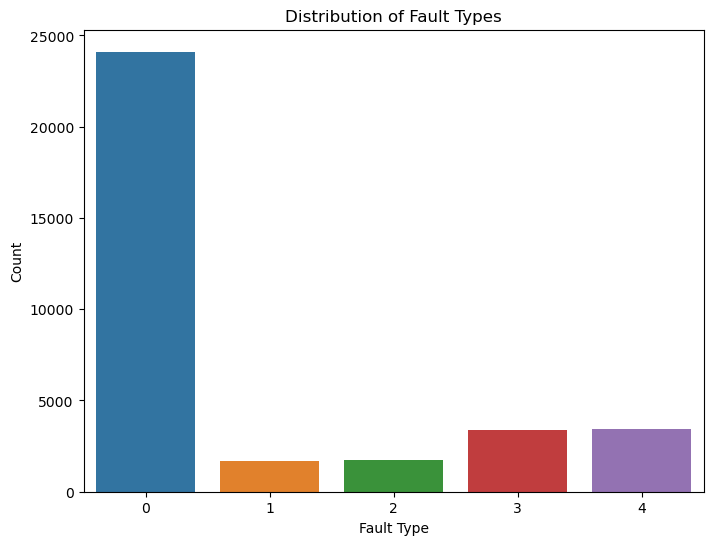

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fault_type', data=df)
plt.title("Distribution of Fault Types")
plt.xlabel("Fault Type")
plt.ylabel("Count")
plt.show()

C:\Users\91983\AppData\Local\Temp\ipykernel_13348\497691546.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


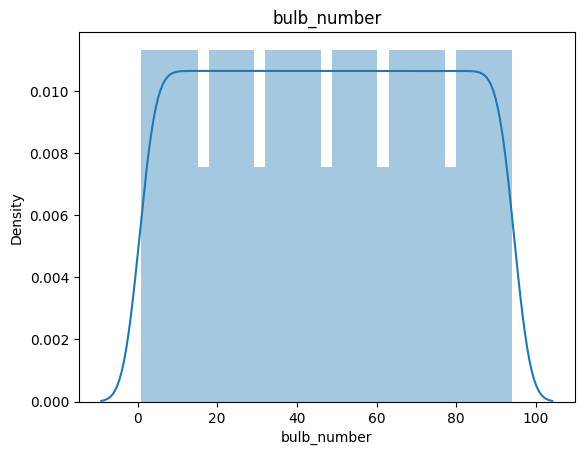

C:\Users\91983\AppData\Local\Temp\ipykernel_13348\497691546.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


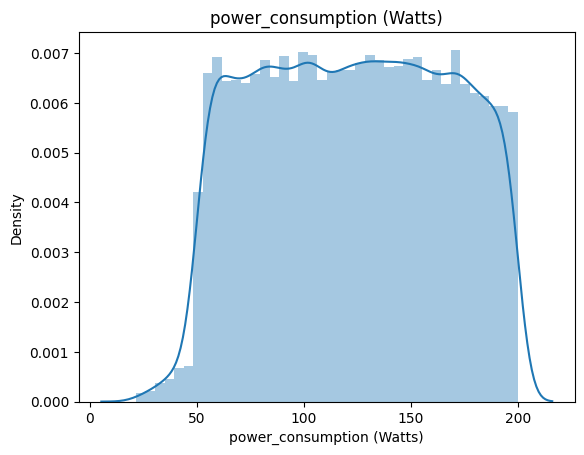

C:\Users\91983\AppData\Local\Temp\ipykernel_13348\497691546.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


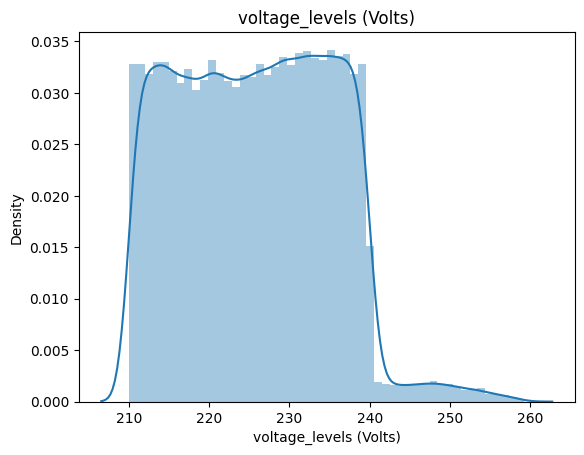

C:\Users\91983\AppData\Local\Temp\ipykernel_13348\497691546.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


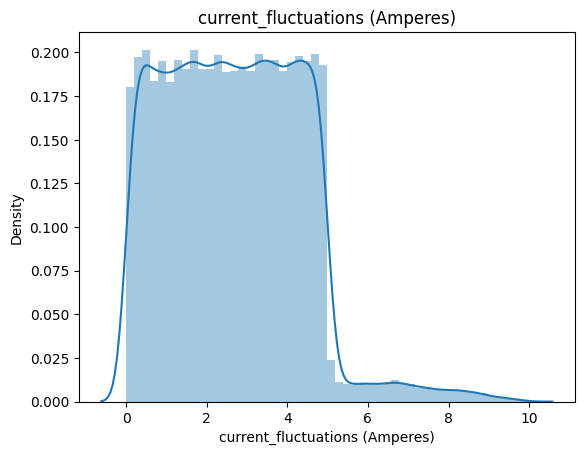

C:\Users\91983\AppData\Local\Temp\ipykernel_13348\497691546.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


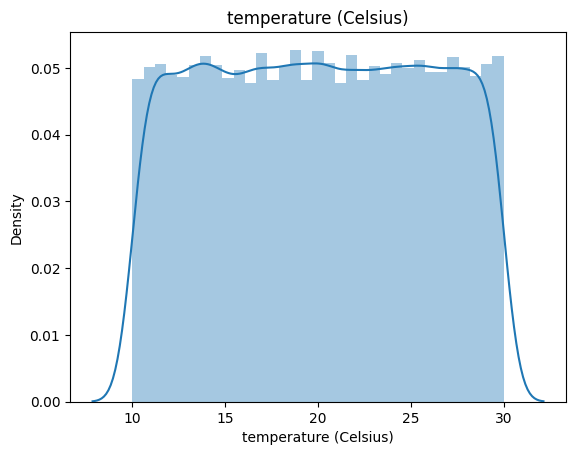

C:\Users\91983\AppData\Local\Temp\ipykernel_13348\497691546.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


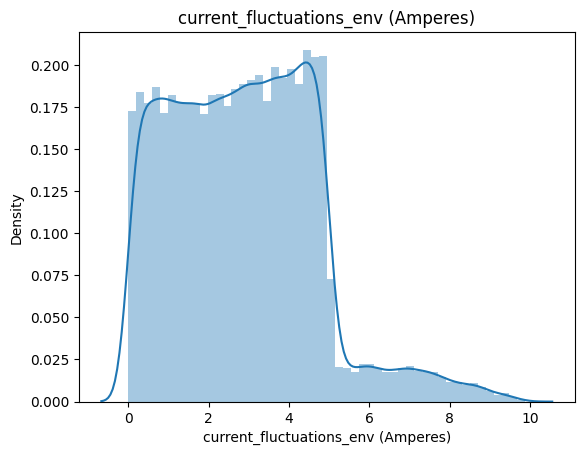

In [48]:
#make probability distribution plot
for columns in numerical:
  sns.distplot(df[columns])
  plt.title(columns)
  plt.show()

array([[<Axes: title={'center': 'bulb_number'}>,
        <Axes: title={'center': 'power_consumption (Watts)'}>],
       [<Axes: title={'center': 'voltage_levels (Volts)'}>,
        <Axes: title={'center': 'current_fluctuations (Amperes)'}>],
       [<Axes: title={'center': 'temperature (Celsius)'}>,
        <Axes: title={'center': 'current_fluctuations_env (Amperes)'}>]],
      dtype=object)

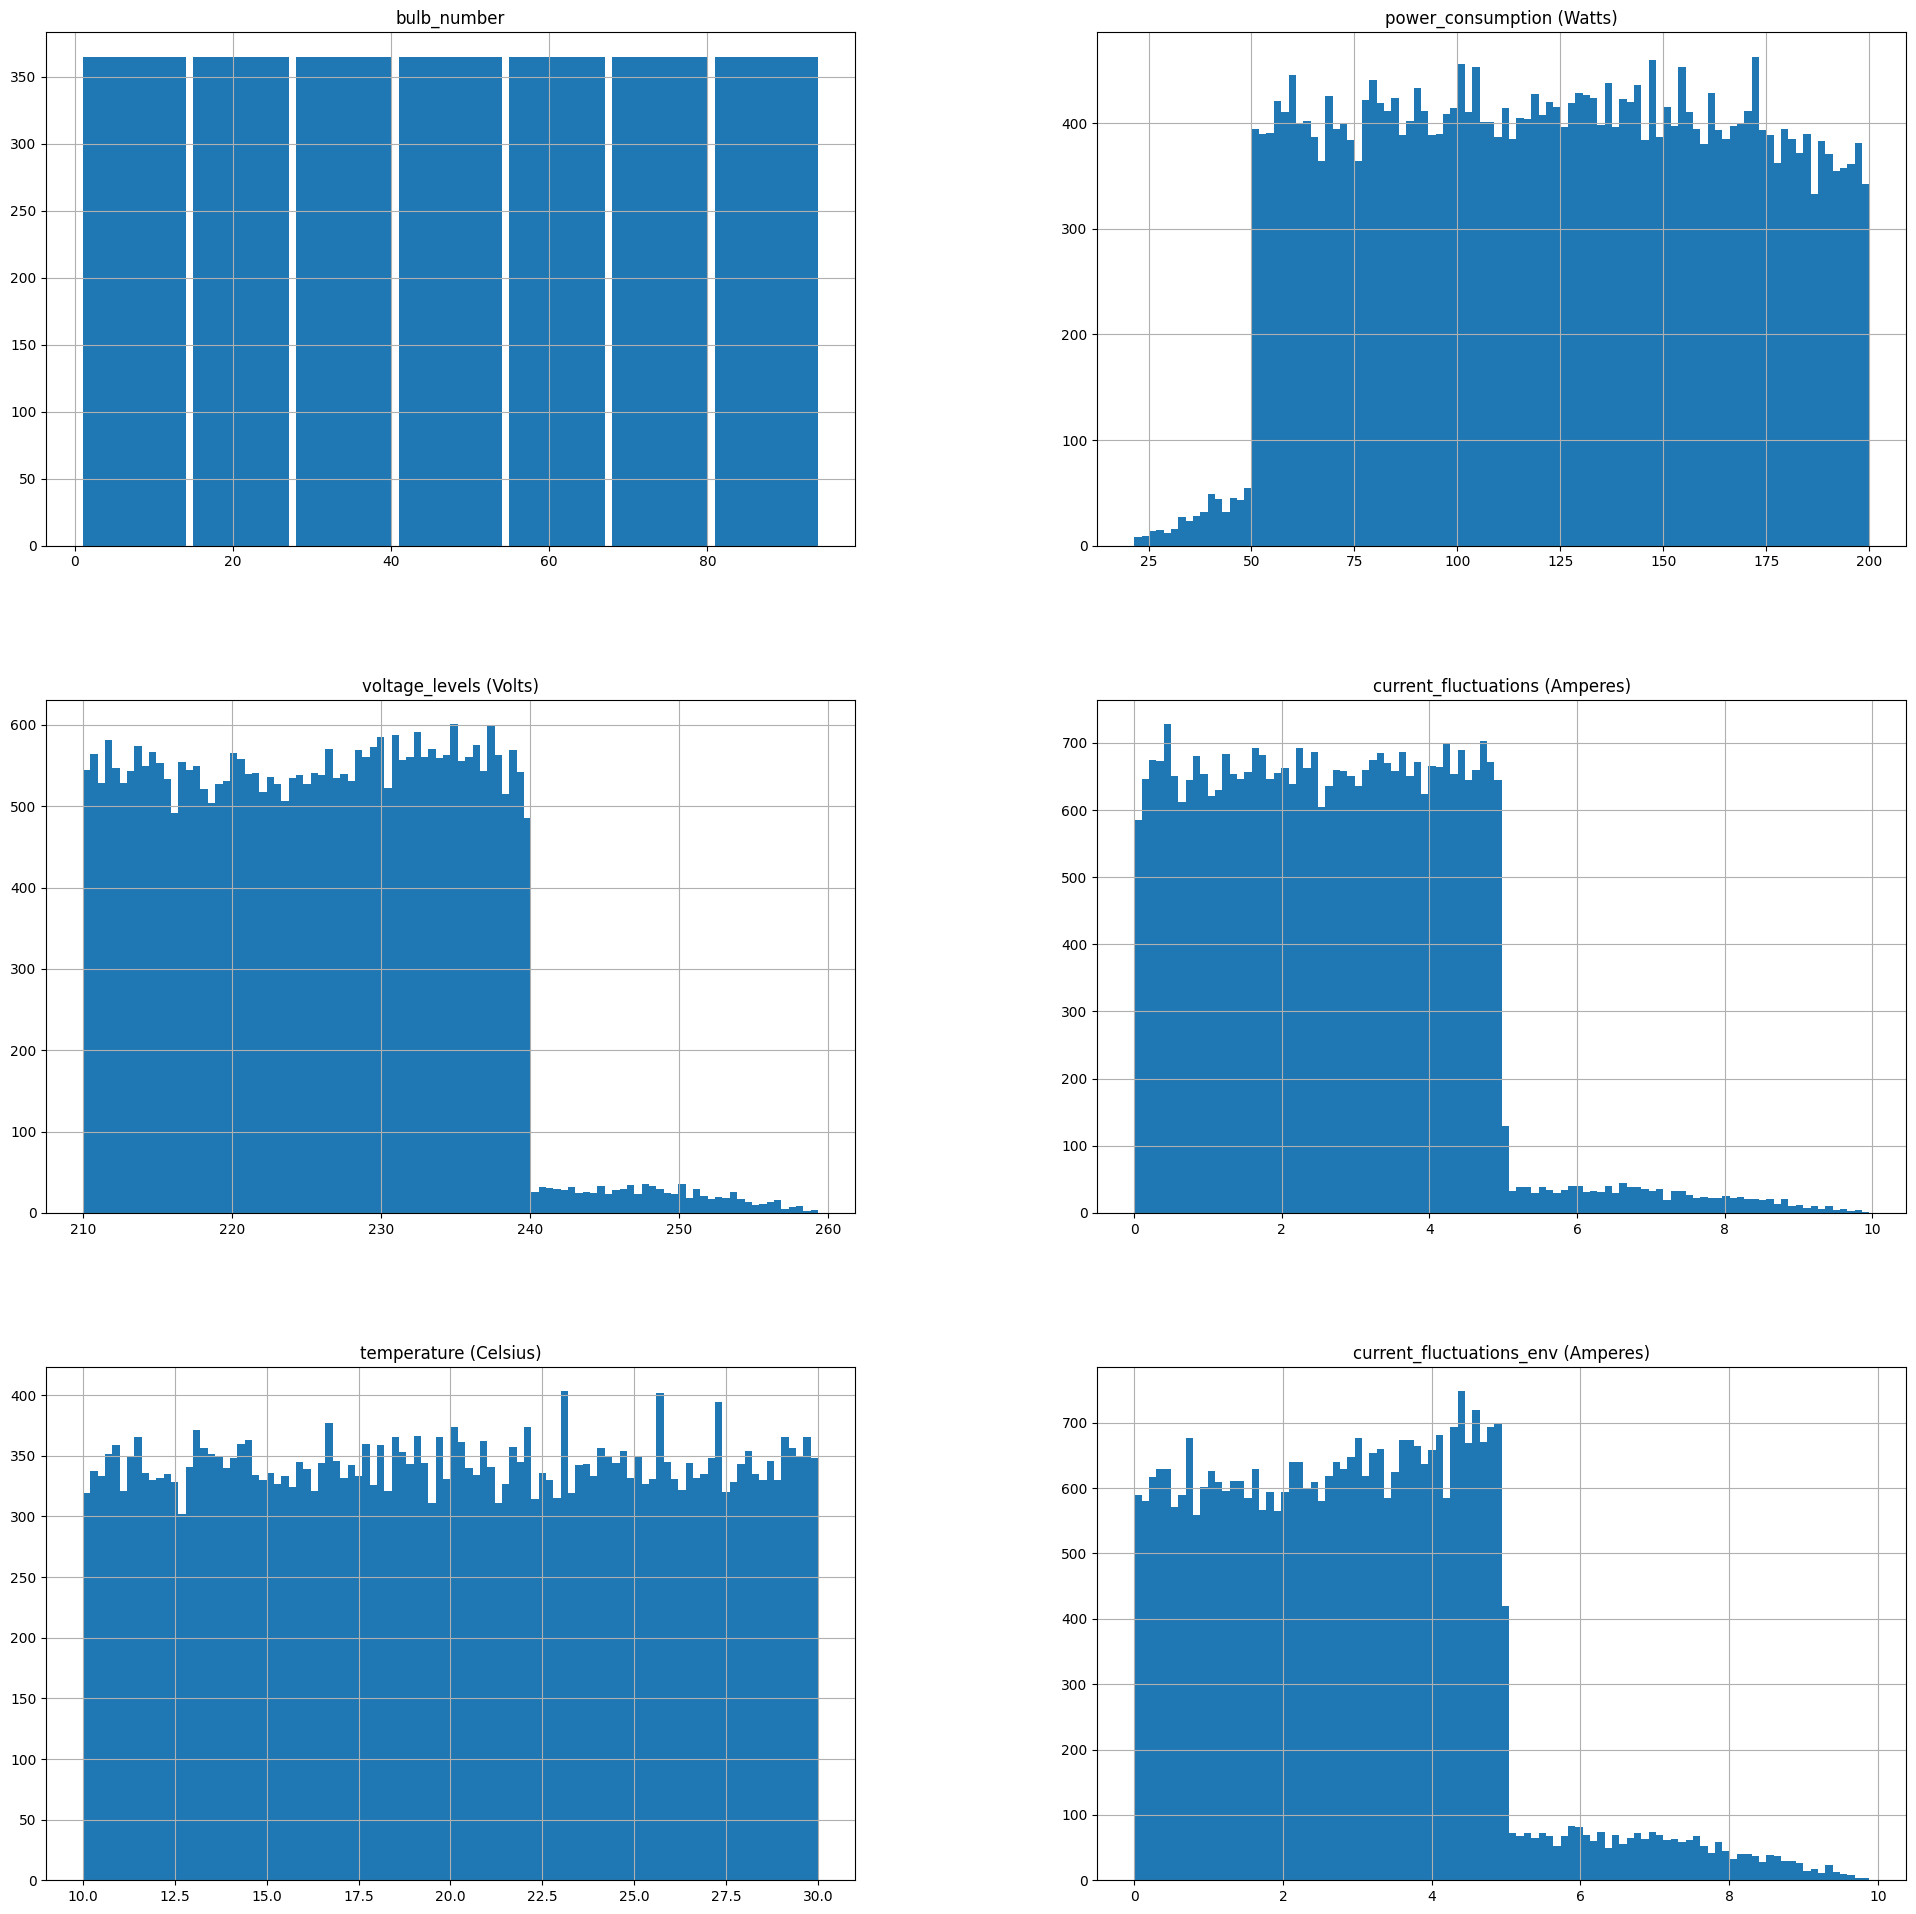

In [49]:
#plot histogram of the columns of data
df[numerical].hist(figsize = (24,24), bins = 100)

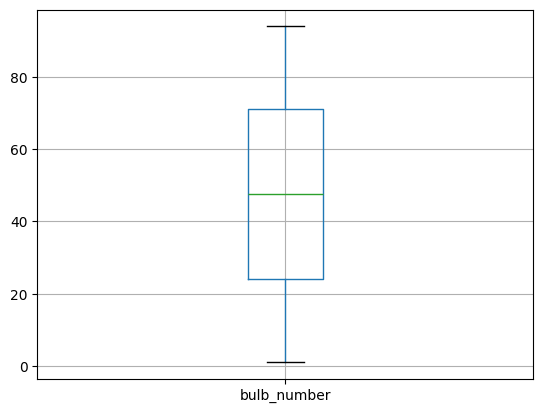

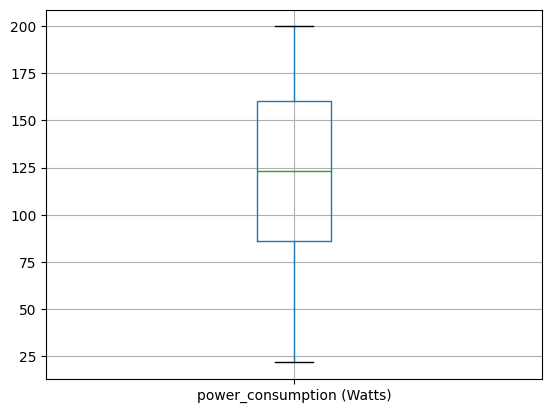

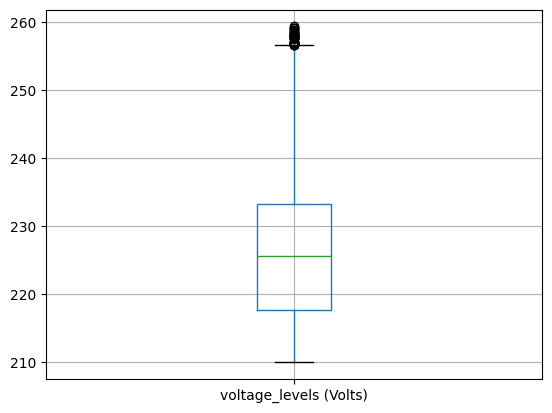

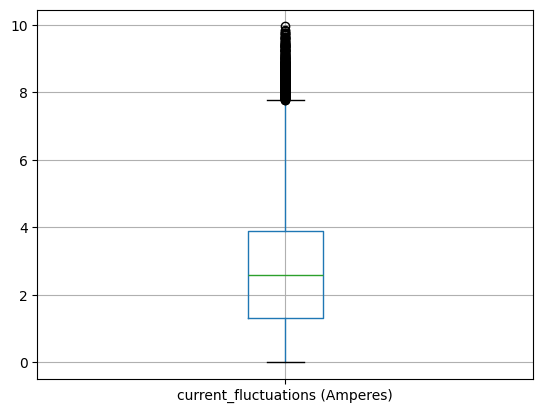

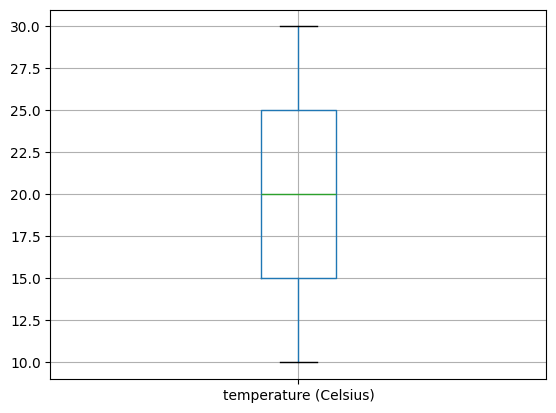

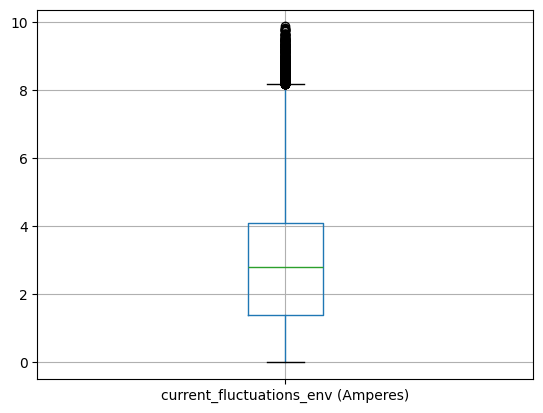

In [50]:
#plot outliers in the data
for columns in numerical:
  df.boxplot([columns])
  #plt.tight_layout()
  plt.show()
  

In [51]:
df.head()

,bulb_number,timestamp,power_consumption (Watts),voltage_levels (Volts),current_fluctuations (Amperes),temperature (Celsius),environmental_conditions,current_fluctuations_env (Amperes),fault_type
0,1,2023-09-06 07:53:23,106.18,238.52,6.127984,21.97,Rainy,0.780000,1
1,1,2023-03-28 16:28:29,58.71,235.99,3.010000,24.16,Clear,0.100000,0
2,1,2023-09-20 19:17:46,195.49,234.97,1.060000,13.64,Rainy,0.920000,0
3,1,2023-02-03 18:19:43,95.64,225.74,2.160000,15.82,Rainy,3.060000,0
4,1,2023-01-12 13:43:48,70.92,218.76,1.830000,19.12,Rainy,6.529021,4


In [52]:
noofunique=[]
for index in categorical:
  print(index,"-->",df[index].unique())
  noofunique.append(df[index].unique().shape[0])
for i in range (0,len(noofunique)):
    print(categorical[i],"-->",noofunique[i])

timestamp --> ['2023-09-06 07:53:23' '2023-03-28 16:28:29' '2023-09-20 19:17:46' ...
 '2023-06-13 13:48:56' '2023-02-06 19:31:33' '2023-02-14 05:46:27']
environmental_conditions --> ['Rainy' 'Clear' 'Cloudy']
timestamp --> 34288
environmental_conditions --> 3


In [53]:
###     Categorical to numerical     ###
######   Label Encoding         ######

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

label_mappings = {}
encoded_values = label_encoder.fit_transform(df["environmental_conditions"])
df["environmental_conditions"] = encoded_values
label_mappings["environmental_conditions"] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f'Label mapping for {"environmental_conditions"}: {label_mappings["environmental_conditions"]}')


Label mapping for environmental_conditions: {'Clear': 0, 'Cloudy': 1, 'Rainy': 2}


In [54]:
#how to get a mapped value
mappings=label_mappings.get('environmental_conditions')
mapped_value=mappings['Clear']
print(mapped_value)

0


In [55]:
print(label_mappings)

{'environmental_conditions': {'Clear': 0, 'Cloudy': 1, 'Rainy': 2}}


In [56]:
df.head()

,bulb_number,timestamp,power_consumption (Watts),voltage_levels (Volts),current_fluctuations (Amperes),temperature (Celsius),environmental_conditions,current_fluctuations_env (Amperes),fault_type
0,1,2023-09-06 07:53:23,106.18,238.52,6.127984,21.97,2,0.780000,1
1,1,2023-03-28 16:28:29,58.71,235.99,3.010000,24.16,0,0.100000,0
2,1,2023-09-20 19:17:46,195.49,234.97,1.060000,13.64,2,0.920000,0
3,1,2023-02-03 18:19:43,95.64,225.74,2.160000,15.82,2,3.060000,0
4,1,2023-01-12 13:43:48,70.92,218.76,1.830000,19.12,2,6.529021,4


['bulb_number' 'power_consumption (Watts)' 'voltage_levels (Volts)'
 'current_fluctuations (Amperes)' 'temperature (Celsius)'
 'current_fluctuations_env (Amperes)']


C:\Users\91983\AppData\Local\Temp\ipykernel_13348\2155829183.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '141.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column] >= Upper_Bound,column] = Upper_Bound


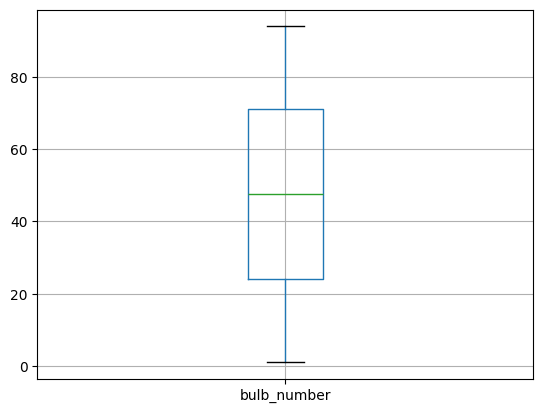

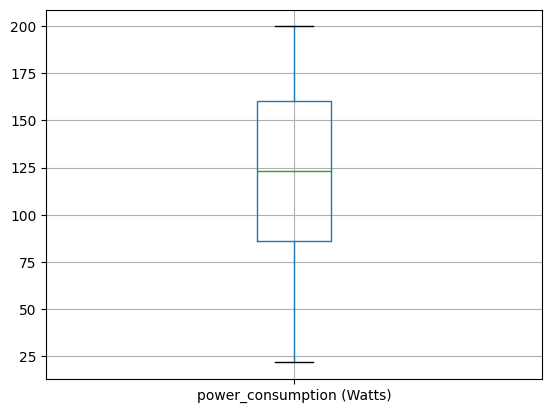

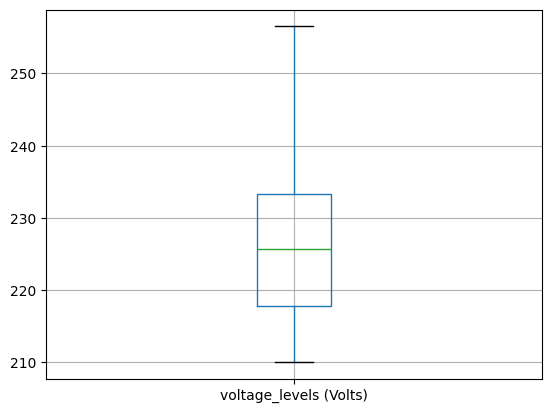

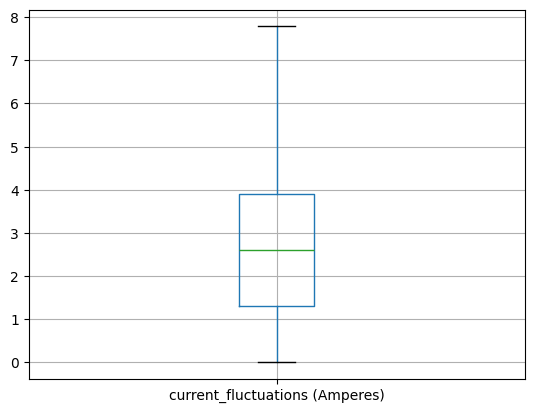

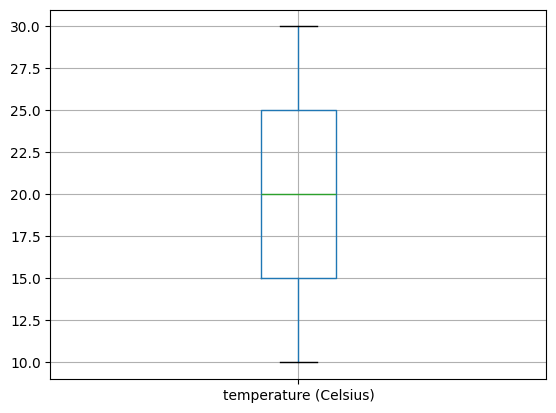

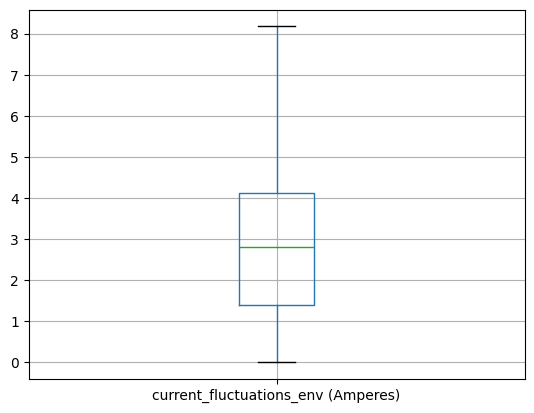

In [57]:
###   Outliers Removal   ###

print(numerical)
for column in numerical :
  q3 = df[column].quantile(0.75)
  q1 = df[column].quantile(0.25)
  IQR = q3-q1
  Upper_Bound = q3 + 1.5*IQR
  Lower_Bound = q1 - 1.5*IQR
  df.loc[df[column] >= Upper_Bound,column] = Upper_Bound
  df.loc[df[column] <= Lower_Bound,column] = Lower_Bound
for columns in numerical:
    
    df.boxplot([columns])
    plt.show()

In [58]:
#Normalization by square root method
df1=df.copy()
numerical = df.columns.values
print(numerical)
indices = np.where(numerical=='timestamp')
numerical = np.delete(numerical,indices)
indices = np.where(numerical=='fault_type')
numerical = np.delete(numerical,indices)
print(numerical)
for column in numerical:
    df1[column]= np.sqrt(df1[column])
#df1.head()
df1.drop(columns=['timestamp','fault_type']).skew()

['bulb_number' 'timestamp' 'power_consumption (Watts)'
 'voltage_levels (Volts)' 'current_fluctuations (Amperes)'
 'temperature (Celsius)' 'environmental_conditions'
 'current_fluctuations_env (Amperes)' 'fault_type']
['bulb_number' 'power_consumption (Watts)' 'voltage_levels (Volts)'
 'current_fluctuations (Amperes)' 'temperature (Celsius)'
 'environmental_conditions' 'current_fluctuations_env (Amperes)']


bulb_number                          -0.536715
power_consumption (Watts)            -0.277138
voltage_levels (Volts)                0.162410
current_fluctuations (Amperes)       -0.386541
temperature (Celsius)                -0.188063
environmental_conditions             -0.371729
current_fluctuations_env (Amperes)   -0.326064
dtype: float64

In [59]:
#Normalization by logarithm method
df2=df.copy()
for column in numerical:
    df2[column]= np.log(df2[column])
#df2.head()
df2.drop(columns=['timestamp','fault_type']).skew()

c:\Users\91983\Desktop\Python model-2\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\91983\Desktop\Python model-2\venv\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


bulb_number                          -1.521264
power_consumption (Watts)            -0.598128
voltage_levels (Volts)                0.123884
current_fluctuations (Amperes)             NaN
temperature (Celsius)                -0.382217
environmental_conditions                   NaN
current_fluctuations_env (Amperes)         NaN
dtype: float64

In [60]:
#Normalization by exponential method
df3=df.copy()
for column in numerical:
    df3[column]= np.exp(df3[column])
#df3.head()
df3.drop(columns=['timestamp','fault_type']).skew()

c:\Users\91983\Desktop\Python model-2\venv\Lib\site-packages\pandas\core\nanops.py:1260: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
c:\Users\91983\Desktop\Python model-2\venv\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\91983\Desktop\Python model-2\venv\Lib\site-packages\pandas\core\nanops.py:1272: RuntimeWarning: overflow encountered in scalar power
  result = (count * (count - 1) ** 0.5 / (count - 2)) * (m3 / m2**1.5)


bulb_number                            8.031679
power_consumption (Watts)             12.558947
voltage_levels (Volts)                      NaN
current_fluctuations (Amperes)         7.421175
temperature (Celsius)                  3.850600
environmental_conditions               0.467776
current_fluctuations_env (Amperes)     5.994707
dtype: float64

In [61]:
df=df1.copy()
df.head()

,bulb_number,timestamp,power_consumption (Watts),voltage_levels (Volts),current_fluctuations (Amperes),temperature (Celsius),environmental_conditions,current_fluctuations_env (Amperes),fault_type
0,1.0,2023-09-06 07:53:23,10.304368,15.444093,2.475476,4.687217,1.414214,0.883176,1
1,1.0,2023-03-28 16:28:29,7.662245,15.361966,1.734935,4.915282,0.000000,0.316228,0
2,1.0,2023-09-20 19:17:46,13.981774,15.328731,1.029563,3.693237,1.414214,0.959166,0
3,1.0,2023-02-03 18:19:43,9.779571,15.024646,1.469694,3.977436,1.414214,1.749286,0
4,1.0,2023-01-12 13:43:48,8.421401,14.790538,1.352775,4.372642,1.414214,2.555195,4


In [62]:
df.drop(columns=['timestamp']).skew()

bulb_number                          -0.536715
power_consumption (Watts)            -0.277138
voltage_levels (Volts)                0.162410
current_fluctuations (Amperes)       -0.386541
temperature (Celsius)                -0.188063
environmental_conditions             -0.371729
current_fluctuations_env (Amperes)   -0.326064
fault_type                            1.320950
dtype: float64

<Axes: >

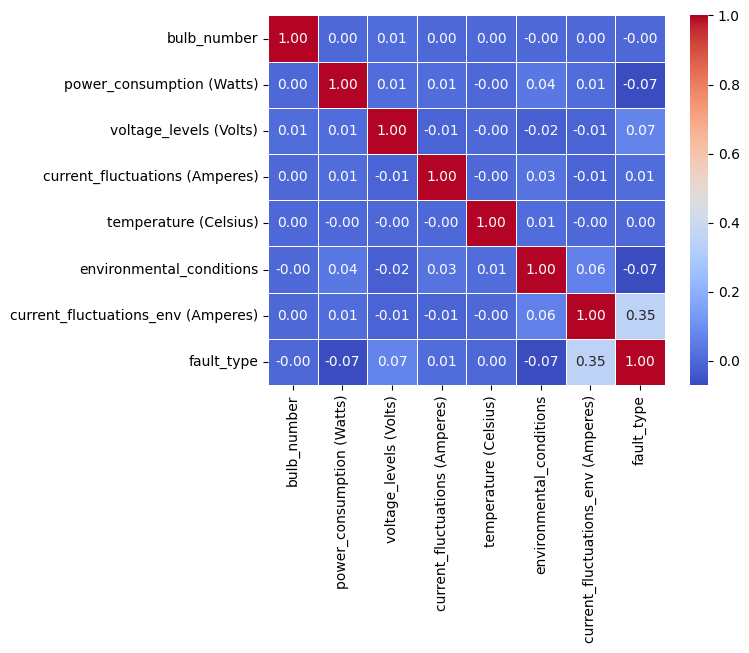

In [63]:
#find correlation matrix
correlation_matrix = df.drop(columns=['timestamp']).corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

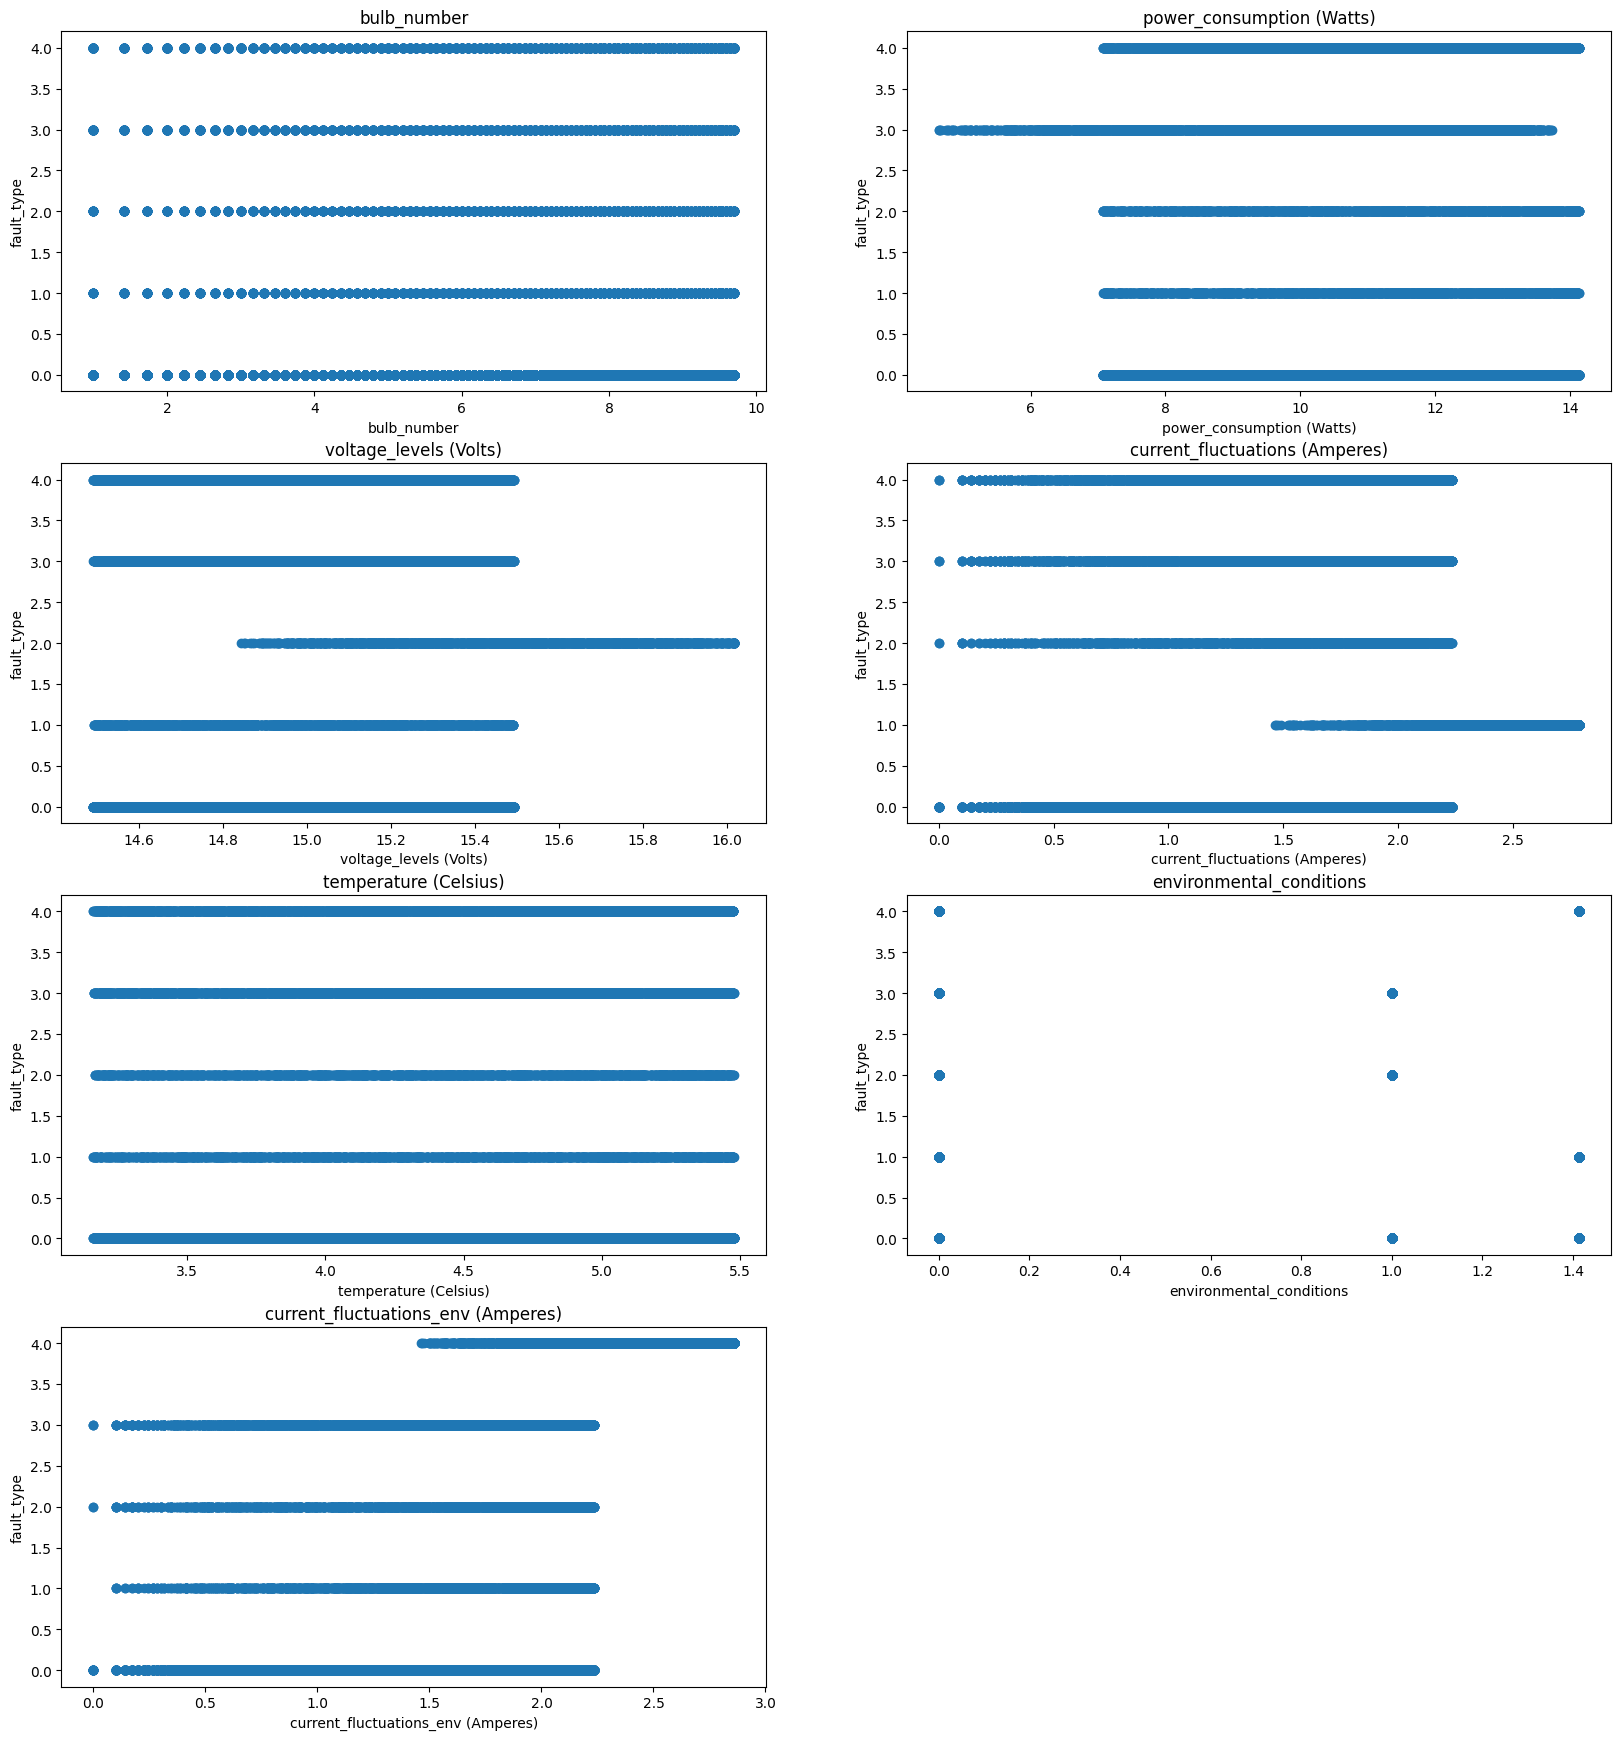

In [64]:
#plot scatter diagram of every column
plt.figure(figsize=(20,100))

features = df.columns.values
#print(features)
indices = np.where(features=='timestamp')
features = np.delete(features,indices)
indices = np.where(features=='fault_type')
features = np.delete(features,indices)
target = df['fault_type']
#print(features)
for i, col in enumerate(features):
    plt.subplot(18 , 2, i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('fault_type')

3 Modelling
3.1 Splitting the data
3.2 Trying three Different Models
    a Naive Bayes Classifier
    b Decision Tree Classifier
    c Random Forest Classifier

3.3 Selecting a model bases on Performance Metrics

In [65]:
#selecting features and target values
df = df.sample(frac = 1)
x = df.iloc[:,[0,2,3,4,5,6,7]]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(34310, 7)
(34310,)


In [66]:
x.head()

,bulb_number,power_consumption (Watts),voltage_levels (Volts),current_fluctuations (Amperes),temperature (Celsius),environmental_conditions,current_fluctuations_env (Amperes)
20098,7.483315,10.907795,14.716657,0.916515,5.037857,1.414214,1.737815
28818,8.888194,13.782235,14.657762,1.664332,4.075537,1.000000,2.123676
1228,2.000000,12.663324,15.350570,1.849324,3.324154,0.000000,1.977372
31392,9.327379,7.589442,15.159156,2.022375,3.446738,1.000000,1.385641
796,1.732051,7.930952,14.550258,1.797560,4.659399,1.414214,1.649242


In [67]:
y.head()

20098    0
28818    0
1228     3
31392    3
796      1
Name: fault_type, dtype: int64

In [68]:
#seperate training and tetsing data
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27448, 7)
(6862, 7)
(27448,)
(6862,)


In [69]:
#fit training data into logistic regression model
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [70]:
#use model to predict y
ypred = model.predict(x_test)
print(ypred)
#print(y_test.values)

[0 4 0 ... 0 0 0]


In [71]:
#print training and testing score of model
print('Training score',model.score(x_train,y_train))
print('Testing score',model.score(x_test,y_test))

Training score 0.7928446517050423
Testing score 0.8026814339842612


In [72]:
#evaluation of performance
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,ypred)
rmse = np.sqrt(mean_squared_error(y_test,ypred))
mae = mean_absolute_error(y_test,ypred)
print('MSE',mse)
print('RMSE',rmse)
print('MAE',mae)
print('Model score',model.score(x,y))

MSE 1.6455843777324395
RMSE 1.282803327767916
MAE 0.5348294957738269
Model score 0.794812008160886


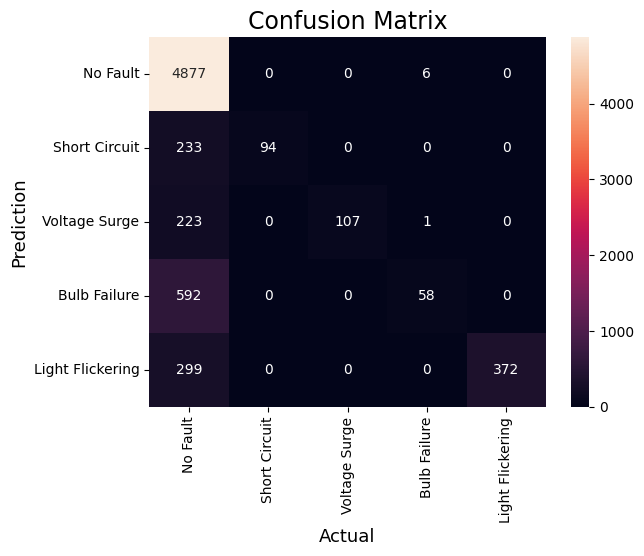

In [73]:
#implementing confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred)
#print(cm)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['No Fault','Short Circuit','Voltage Surge','Bulb Failure','Light Flickering'],
            yticklabels=['No Fault','Short Circuit','Voltage Surge','Bulb Failure','Light Flickering'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [74]:
#evaluate presision,recall and f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4883
           1       1.00      0.29      0.45       327
           2       1.00      0.32      0.49       331
           3       0.89      0.09      0.16       650
           4       1.00      0.55      0.71       671

    accuracy                           0.80      6862
   macro avg       0.94      0.45      0.54      6862
weighted avg       0.84      0.80      0.75      6862



In [75]:
#evaluate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, ypred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 80.27%


In [76]:
ypred2 = model.predict([[63,142.56,272.36,6.148,25.36,1,0.63],[68,172.56,212.36,6.005,28.36,0,0.64],[1,192.33,238.97,4.04,16.09,2,4.542699079536471]])
print(ypred2)

[2 2 2]


c:\Users\91983\Desktop\Python model-2\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [77]:
# Train Decision Tree Classifer
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [78]:
#use decision tree classifier to predict values
ypred2 = clf.predict(x_test)
print(ypred2)

[0 4 0 ... 0 0 0]


In [79]:
#print training and testing score of model
print('Training score',clf.score(x_train,y_train))
print('Testing score',clf.score(x_test,y_test))

Training score 1.0
Testing score 0.7491984844068784


In [80]:
#from sklearn.metrics import mean_squared_error,mean_absolute_error
mse2 = mean_squared_error(y_test,ypred2)
rmse2 = np.sqrt(mean_squared_error(y_test,ypred2))
mae2 = mean_absolute_error(y_test,ypred2)
print('MSE',mse2)
print('RMSE',rmse2)
print('MAE',mae2)
print('Model score',clf.score(x,y))

MSE 2.0899154765374526
RMSE 1.4456539961337405
MAE 0.6877003788982804
Model score 0.9498396968813757


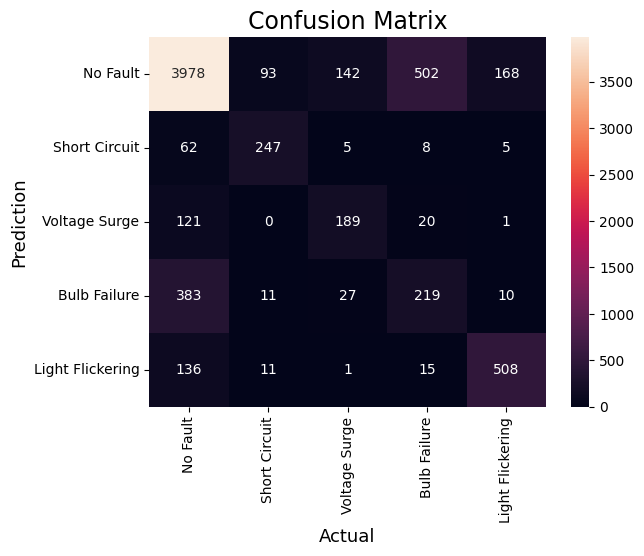

In [81]:
#implementing confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred2)
#print(cm)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['No Fault','Short Circuit','Voltage Surge','Bulb Failure','Light Flickering'],
            yticklabels=['No Fault','Short Circuit','Voltage Surge','Bulb Failure','Light Flickering'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [82]:
#evaluate presision,recall and f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred2))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      4883
           1       0.68      0.76      0.72       327
           2       0.52      0.57      0.54       331
           3       0.29      0.34      0.31       650
           4       0.73      0.76      0.75       671

    accuracy                           0.75      6862
   macro avg       0.61      0.65      0.63      6862
weighted avg       0.76      0.75      0.75      6862



In [83]:
#evaluate accuracy
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test, ypred2)
print("Accuracy: {:.2f}%".format(accuracy2 * 100))

Accuracy: 74.92%


In [84]:
ypred2 = clf.predict([[63,142.56,272.36,6.148,25.36,1,0.63],[68,172.56,212.36,6.005,28.36,0,0.64],[1,192.33,238.97,4.04,16.09,2,4.542699079536471]])
print(ypred2)

[1 1 4]


c:\Users\91983\Desktop\Python model-2\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [85]:
#Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [86]:
# predict values using random forest classifier
ypred3 = rf_model.predict(x_test)
print(ypred3)

[0 4 0 ... 0 0 0]


In [87]:
#print training and testing score of model
print('Training score',rf_model.score(x_train,y_train))
print('Testing score',rf_model.score(x_test,y_test))

Training score 1.0
Testing score 0.8539784319440397


In [88]:
#from sklearn.metrics import mean_squared_error,mean_absolute_error
mse3 = mean_squared_error(y_test,ypred3)
rmse3 = np.sqrt(mean_squared_error(y_test,ypred3))
mae3 = mean_absolute_error(y_test,ypred3)
print('MSE',mse3)
print('RMSE',rmse3)
print('MAE',mae3)
print('Model score',rf_model.score(x,y))

MSE 1.294812008160886
RMSE 1.1378980658041766
MAE 0.41809967939376275
Model score 0.970795686388808


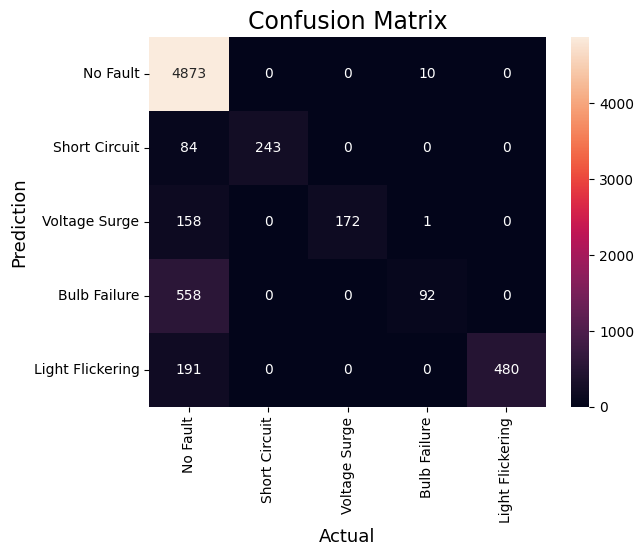

In [89]:
#implementing confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred3)
#print(cm)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['No Fault','Short Circuit','Voltage Surge','Bulb Failure','Light Flickering'],
            yticklabels=['No Fault','Short Circuit','Voltage Surge','Bulb Failure','Light Flickering'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [90]:
#evaluate presision,recall and f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred3))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      4883
           1       1.00      0.74      0.85       327
           2       1.00      0.52      0.68       331
           3       0.89      0.14      0.24       650
           4       1.00      0.72      0.83       671

    accuracy                           0.85      6862
   macro avg       0.94      0.62      0.70      6862
weighted avg       0.87      0.85      0.82      6862



In [91]:
#evaluate accuracy
from sklearn.metrics import accuracy_score
accuracy3 = accuracy_score(y_test, ypred3)
print("Accuracy: {:.2f}%".format(accuracy3 * 100))

Accuracy: 85.40%


In [92]:
ypred2 = rf_model.predict([[63,142.56,272.36,6.148,25.36,1,0.63],[68,172.56,212.36,6.005,28.36,0,0.64],[1,192.33,238.97,4.04,16.09,2,4.542699079536471]])
print(ypred2)

[1 1 4]


c:\Users\91983\Desktop\Python model-2\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [93]:
import pickle
with open('model.pkl','wb') as files:
    pickle.dump(rf_model,files)